### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = 4,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = 2,$

$\Psi_1(0) = 0, \Psi_2(0) = 0, x \in [0, 5]$

In [3]:
from typing import List
import autograd.numpy as np

from neural_network import MLPNeuralNetwork
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode, print_error

In [4]:
PSI_0 = np.array([0, 0])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = np.full((x.size), 4)
    psi_2_dot = np.full((x.size), 2)
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = 4 * x
    psi_2 = 2 * x

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, nn: MLPNeuralNetwork, weights: List[np.array], k=0
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights: The weights and biases of the neural network

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(t),)
    """
    fp = nn.forward(t, weights).reshape(t.size)
    return PSI_0[k] + t * fp

### Training

Iteration:  0
 4.677809944241438
Iteration:  1
 4.616760571550635
Iteration:  2
 4.556408525191111
Iteration:  3
 4.496771156095815
Iteration:  4
 4.437854868720679
Iteration:  5
 4.3796509440977545
Iteration:  6
 4.322129877513368
Iteration:  7
 4.265238312662787
Iteration:  8
 4.208899329769887
Iteration:  9
 4.15301229241767
Iteration:  10
 4.0974576768705875
Iteration:  11
 4.042107787110895
Iteration:  12
 3.9868384400078996
Iteration:  13
 3.931539407989258
Iteration:  14
 3.8761228962185577
Iteration:  15
 3.820528612126832
Iteration:  16
 3.7647245438964063
Iteration:  17
 3.7087039320130746
Iteration:  18
 3.652479800626179
Iteration:  19
 3.5960784995095527
Iteration:  20
 3.539533308243684
Iteration:  21
 3.4828786638613978
Iteration:  22
 3.4261452103921544
Iteration:  23
 3.369355689645787
Iteration:  24
 3.3125216743424293
Iteration:  25
 3.2556412286953043
Iteration:  26
 3.1986976913866747
Iteration:  27
 3.141659838561724
Iteration:  28
 3.084483639791559
Iteration:  2

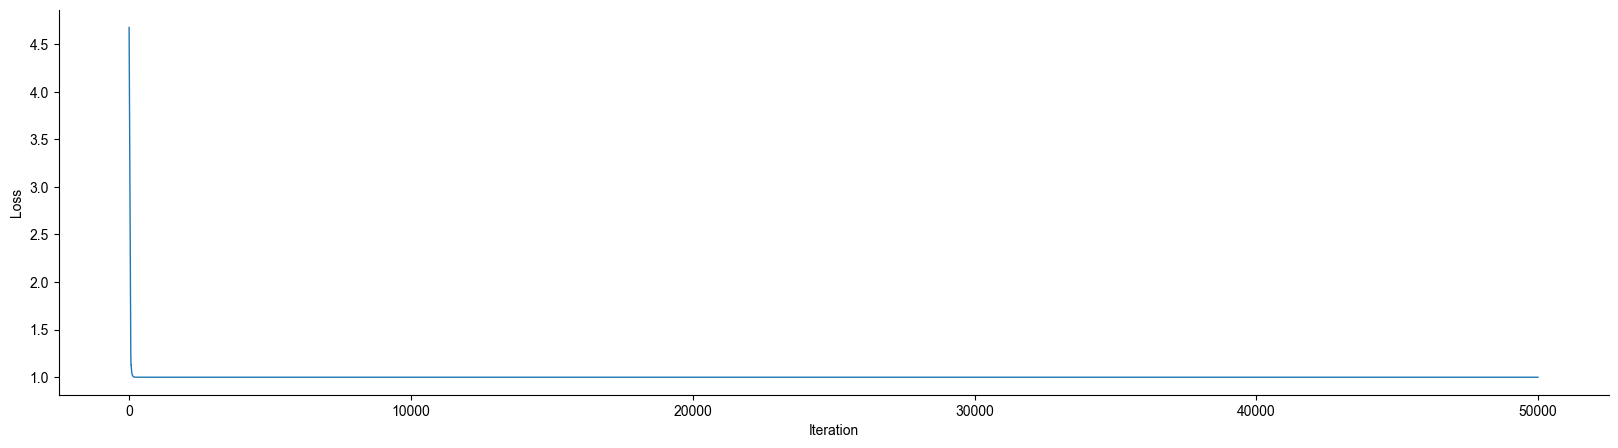

In [5]:
def train():
    t = np.arange(0, 5, 0.5)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn1 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    nn2 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    adam(
        t,
        [nn1, nn2],
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.01,
        threshold=0.01,
        log=True,
    )

    return [nn1, nn2]


nns = train()

### Evaluating Results

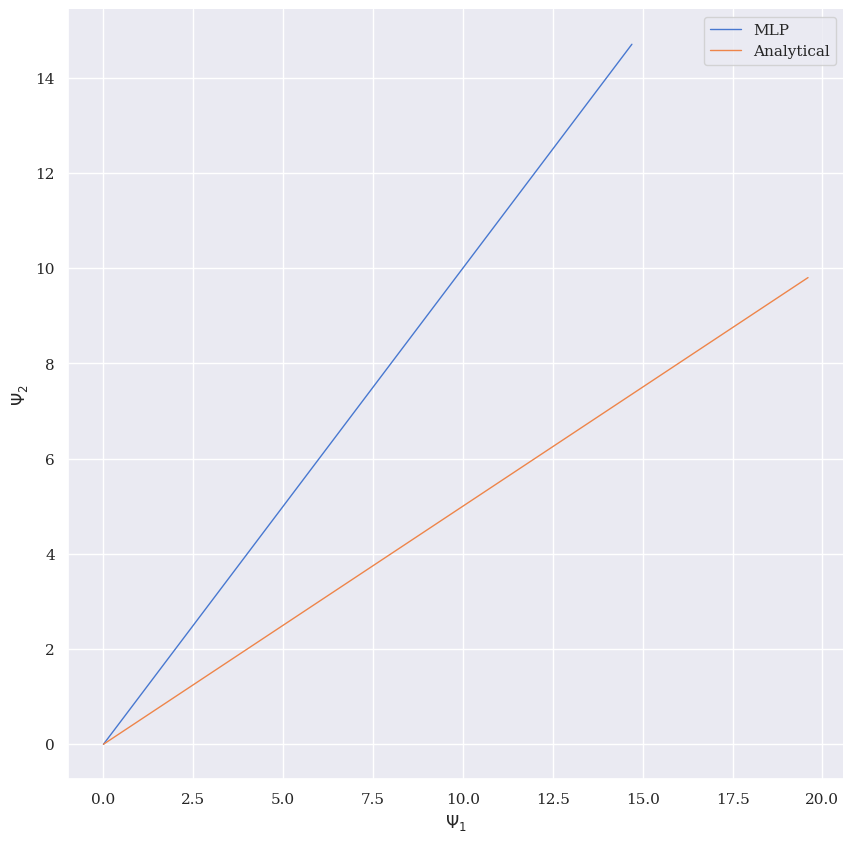

In [6]:
plot_system_ode(nns, trial_solution, analytical_solution, t=np.arange(0, 5, 0.1))

In [7]:
t = np.arange(0, 5, 0.1)
res = np.array([trial_solution(t, nns[i], nns[i].weights, i) for i in range(len(nns))])

an_sol = analytical_solution(t)

print_error(res, an_sol)

[[ 0.         -0.09997495 -0.19993303 -0.29990071 -0.39988471 -0.49988194
  -0.59988617 -0.69989171 -0.799895   -0.89989473 -0.99989138 -1.09988639
  -1.19988148 -1.29987815 -1.39987734 -1.49987934 -1.5998839  -1.6998903
  -1.79989757 -1.89990468 -1.99991066 -2.09991473 -2.1999164  -2.29991544
  -2.39991192 -2.49990616 -2.59989869 -2.69989017 -2.79988135 -2.89987296
  -2.99986572 -3.09986024 -3.199857   -3.29985631 -3.39985832 -3.49986299
  -3.59987007 -3.69987915 -3.79988967 -3.89990088 -3.99991193 -4.09992185
  -4.19992957 -4.29993397 -4.39993389 -4.49992812 -4.59991548 -4.69989478
  -4.79986487 -4.89982463]
 [ 0.          0.0999637   0.1999131   0.29988831  0.39988724  0.49989139
   0.59988506  0.69986412  0.79983532  0.89981026  0.99979862  1.09980398
   1.1998233   1.29984911  1.39987288  1.49988795  1.59989115  1.69988299
   1.79986671  1.89984693  1.99982823  2.09981421  2.19980698  2.29980707
   2.39981376  2.49982539  2.59983987  2.69985509  2.79986912  2.89988049
   2.9998882